In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

file_path = './Data-Melbourne_F_fixed.csv'
df = pd.read_csv(file_path)
df.head()




,Unnamed: 0,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1382 non-null   int64  
 1   Average Outflow           1382 non-null   float64
 2   Average Inflow            1382 non-null   float64
 3   Energy Consumption        1382 non-null   float64
 4   Ammonia                   1382 non-null   float64
 5   Biological Oxygen Demand  1382 non-null   float64
 6   Chemical Oxygen Demand    1382 non-null   float64
 7   Total Nitrogen            1382 non-null   float64
 8   Average Temperature       1382 non-null   float64
 9   Maximum temperature       1382 non-null   float64
 10  Minimum temperature       1382 non-null   float64
 11  Atmospheric pressure      1382 non-null   float64
 12  Average humidity          1382 non-null   float64
 13  Total rainfall            1382 non-null   float64
 14  Average 

In [3]:
print("Missing values:")
print(df.isnull().sum())



Missing values:
Unnamed: 0                  0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64


In [4]:
#replace the data which is missing with the mean 
df.fillna(df.mean(),inplace=True)

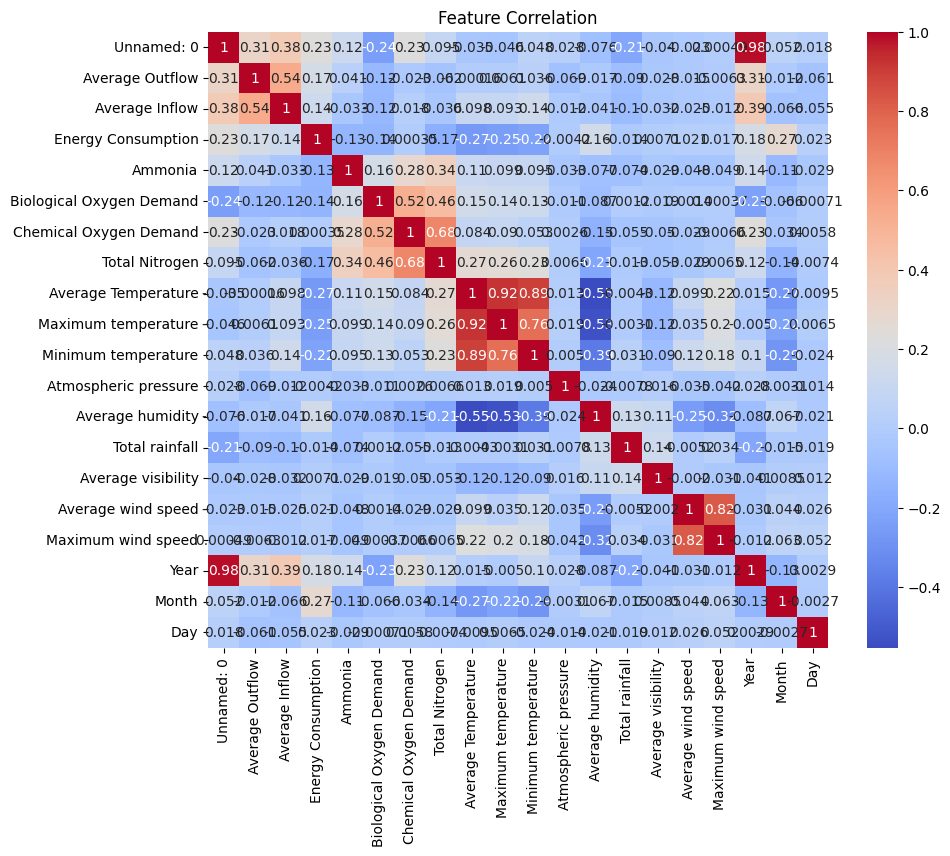

In [5]:

# Standardize features
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))


scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=['float64', 'int64']).columns)
corr_matrix = scaled_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


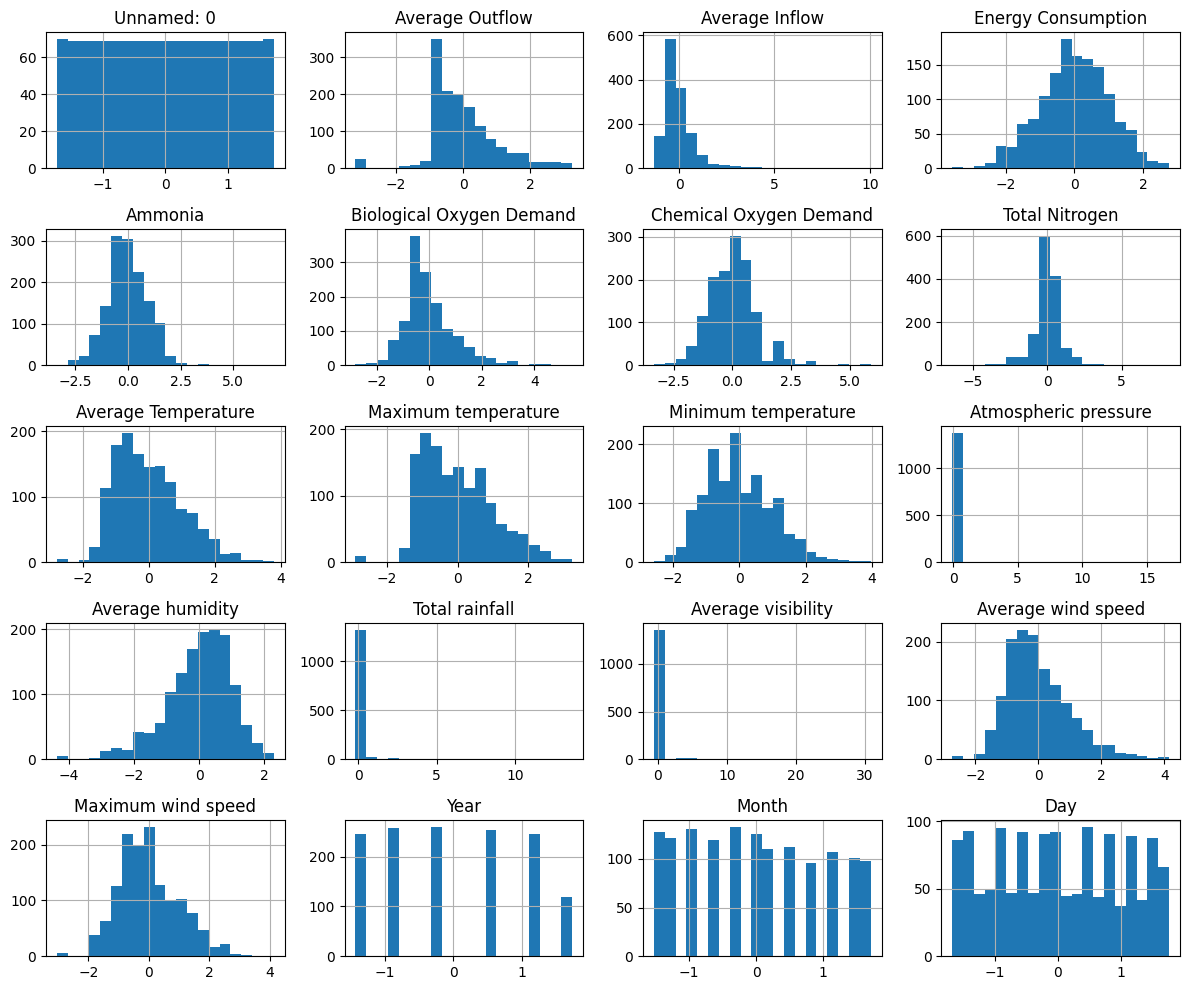

In [6]:
scaled_df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


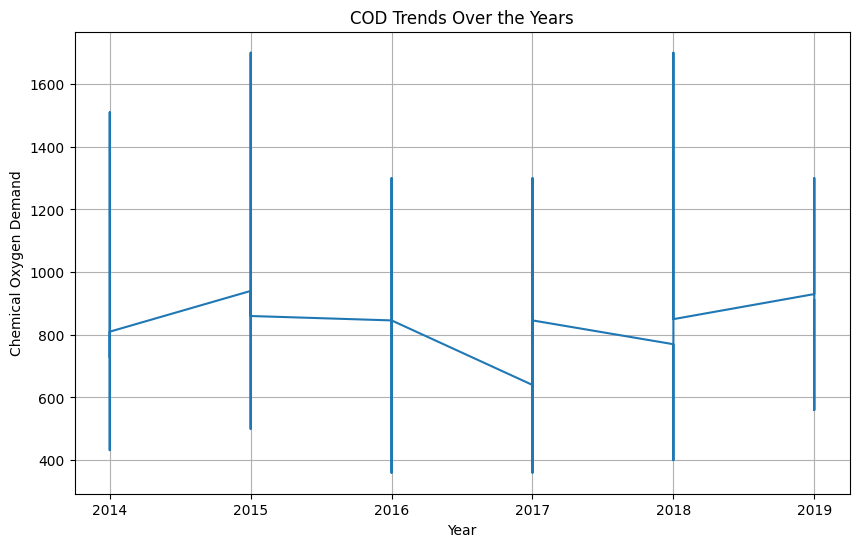

In [7]:
# Plot COD trends with respect to Year
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Chemical Oxygen Demand'])  
plt.xlabel('Year')
plt.ylabel('Chemical Oxygen Demand')
plt.title('COD Trends Over the Years')
plt.grid(True)
plt.show()

In [8]:
X = df.drop('Chemical Oxygen Demand', axis=1)  
Y = df['Chemical Oxygen Demand']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Defining threshold for classification
threshold = Y.mean()
Y_train_class = (Y_train > threshold).astype(int)
Y_test_class = (Y_test > threshold).astype(int)

# Output
print("Mean Threshold:", threshold)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train_class sample:\n", Y_train_class.head())
print("Y_test_class sample:\n", Y_test_class.head())

Mean Threshold: 845.9604341534008
X_train shape: (1105, 19)
X_test shape: (277, 19)
Y_train_class sample:
 415     1
371     1
716     0
1089    0
1107    1
Name: Chemical Oxygen Demand, dtype: int64
Y_test_class sample:
 309    1
741    1
265    1
823    1
778    1
Name: Chemical Oxygen Demand, dtype: int64


Logistic Regression from scratch


In [9]:

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        for _ in range(self.epochs):
            z = np.dot(X, self.theta)
            predictions = self.sigmoid(z)
            error = predictions - Y
            self.theta -= self.learning_rate * (1 / self.m) * np.dot(X.T, error)
    
    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.round(self.sigmoid(z))

log_reg_scratch = LogisticRegressionScratch()
log_reg_scratch.fit(X_train, Y_train_class)
Y_pred_scratch = log_reg_scratch.predict(X_test)


Logistic Regression from sklearn

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, Y_train_class)
Y_pred_sklearn = log_reg_sklearn.predict(X_test)


K-NeartestNeighbour(KNN)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train_class)
Y_pred_knn = knn.predict(X_test)

Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train_class)
Y_pred_dt = dt.predict(X_test)


Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train_class)
Y_pred_rf = rf.predict(X_test)

Support Vector Machine 

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train_class)
Y_pred_svm = svm.predict(X_test)


Model Evaluation:

In [15]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

evaluate_model(Y_test_class, Y_pred_scratch, "Logistic Regression (Scratch)")
evaluate_model(Y_test_class, Y_pred_sklearn, "Logistic Regression (sklearn)")
evaluate_model(Y_test_class, Y_pred_knn, "KNN")
evaluate_model(Y_test_class, Y_pred_dt, "Decision Tree")
evaluate_model(Y_test_class, Y_pred_rf, "Random Forest")
evaluate_model(Y_test_class, Y_pred_svm, "SVM")


Logistic Regression (Scratch) - Accuracy: 0.7798, F1-Score: 0.7889
Confusion Matrix:
[[102  35]
 [ 26 114]]

Logistic Regression (sklearn) - Accuracy: 0.8267, F1-Score: 0.8310
Confusion Matrix:
[[111  26]
 [ 22 118]]

KNN - Accuracy: 0.7473, F1-Score: 0.7388
Confusion Matrix:
[[108  29]
 [ 41  99]]

Decision Tree - Accuracy: 0.8556, F1-Score: 0.8540
Confusion Matrix:
[[120  17]
 [ 23 117]]

Random Forest - Accuracy: 0.8773, F1-Score: 0.8803
Confusion Matrix:
[[118  19]
 [ 15 125]]

SVM - Accuracy: 0.8700, F1-Score: 0.8800
Confusion Matrix:
[[109  28]
 [  8 132]]



Random Forest Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [ 100, 200], 
    'max_depth':[10,20,None],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2] 
} 

grid_search_rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid_search_rf.fit(X_train,Y_train_class)

print(f"Best Parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_
Y_pred_rf_tuned = best_rf.predict(X_test)
evaluate_model(Y_test_class, Y_pred_rf_tuned, "Random Forest (Tuned)")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest (Tuned) - Accuracy: 0.8592, F1-Score: 0.8612
Confusion Matrix:
[[117  20]
 [ 19 121]]

